In [1]:
import json
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#FILE_NAME="./attention_stuff/retention_stats_0_to_399.json"
FILE_NAME="./attention_master.json"

with open(FILE_NAME, 'r') as fd:
    file_obj=json.load(fd)

In [3]:
file_obj.keys()

dict_keys(['successful_files', 'erroneous_video_IDs'])

In [4]:
file_obj['successful_files'][0]['stats'][0]

{'kind': 'youtubeAnalytics#resultTable',
 'columnHeaders': [{'name': 'elapsedVideoTimeRatio',
   'columnType': 'DIMENSION',
   'dataType': 'FLOAT'},
  {'name': 'audienceWatchRatio', 'columnType': 'METRIC', 'dataType': 'FLOAT'},
  {'name': 'relativeRetentionPerformance',
   'columnType': 'METRIC',
   'dataType': 'FLOAT'}],
 'rows': [[0.01, 0.9773000000000001, 0.5189],
  [0.02, 0.7202, 0.50795],
  [0.03, 0.6181, 0.50165],
  [0.04, 0.5333, 0.4987],
  [0.05, 0.4711, 0.4933],
  [0.06, 0.43119999999999997, 0.4842],
  [0.07, 0.414, 0.4716],
  [0.08, 0.3815, 0.45535000000000003],
  [0.09, 0.3563, 0.43725],
  [0.1, 0.3317, 0.4215],
  [0.11, 0.3098, 0.41125],
  [0.12, 0.2948, 0.40895],
  [0.13, 0.27940000000000004, 0.41855],
  [0.14, 0.267, 0.44605],
  [0.15, 0.2623, 0.49455],
  [0.16, 0.267, 0.55385],
  [0.17, 0.2597, 0.60275],
  [0.18, 0.3014, 0.626],
  [0.19, 0.2546, 0.6212],
  [0.2, 0.2527, 0.59625],
  [0.21, 0.248, 0.57065],
  [0.22, 0.2465, 0.5640499999999999],
  [0.23, 0.244, 0.57915],
  

# Inferences about which part of the videos do the audiences watch the most

Get pairs and plot them

In [5]:
file_obj['successful_files'][0]['stats'][0]['rows'][0]

[0.01, 0.9773000000000001, 0.5189]

In [6]:
pair_list=[]
for video_stuff in file_obj['successful_files']:
    all_rows=video_stuff['stats'][0]['rows']
    '''if len(all_rows)!=100:
        print(len(all_rows))'''
    for row in all_rows:
        fraction=row[0]
        audience_watching=row[1]
        pair_list.append([fraction, audience_watching])

In [7]:
len(file_obj['successful_files'])

4872

In [8]:
len(pair_list)

442669

In [9]:
frac_arr=[]
watch_ratio_arr=[]
for pair in pair_list:
    frac_arr.append(pair[0])
    watch_ratio_arr.append(pair[1])

In [10]:
# initialise data of lists.
data = {'fraction_passed':frac_arr, 'audienceWatchRatio':watch_ratio_arr}
 
# Create DataFrame
df = pd.DataFrame(data)

In [11]:
df.columns

Index(['fraction_passed', 'audienceWatchRatio'], dtype='object')

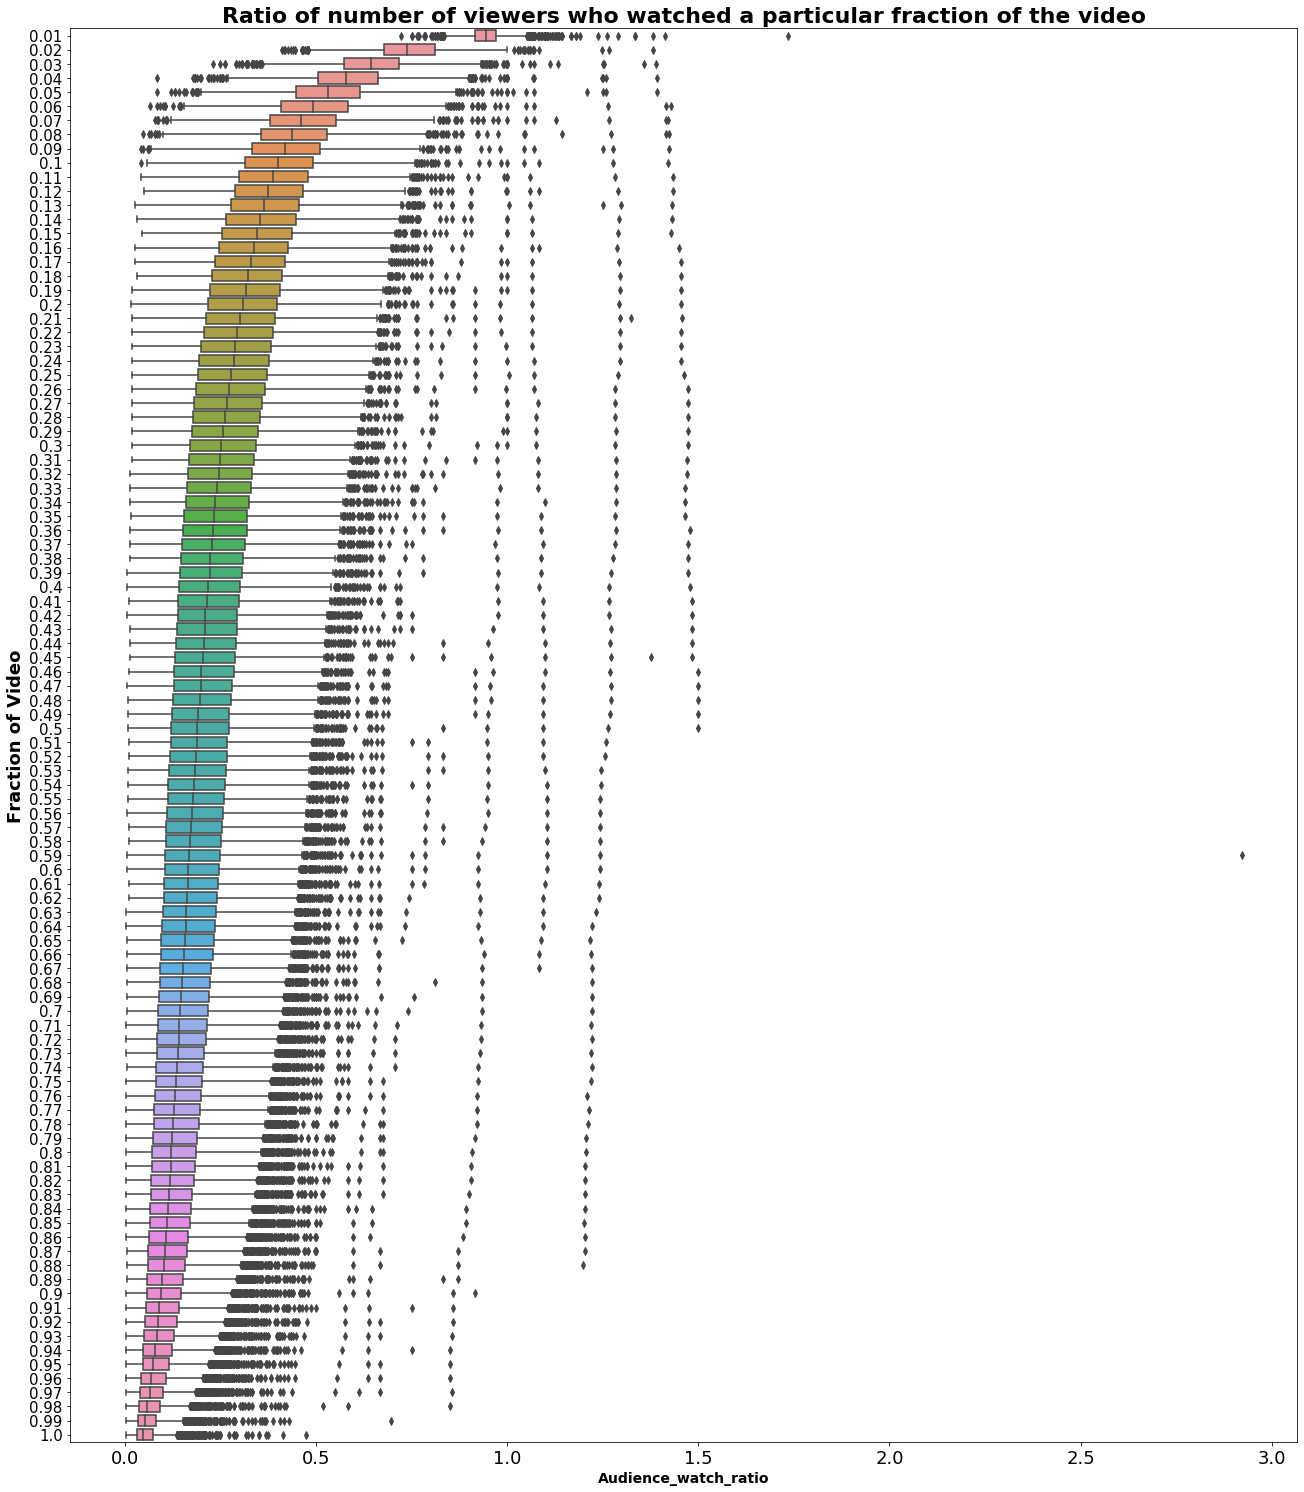

In [14]:
# look at price by year boxplot
# limit upper prices so it's more informative
fig = plt.figure(figsize=(22,26))
ax = fig.gca()
sns.boxplot(x='audienceWatchRatio',y='fraction_passed',data=df,
            order=sorted(df["fraction_passed"].unique()),orient='h')
plt.xlabel('Audience_watch_ratio',fontsize=14,fontweight="bold")
#ax.set_yticklabels(sorted(cc_data.modelYear.unique()))
plt.ylabel('Fraction of Video',fontsize=18,fontweight="bold")
plt.title('Ratio of number of viewers who watched a particular fraction of the video',fontsize=22,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.savefig('foo.png')
plt.show()

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


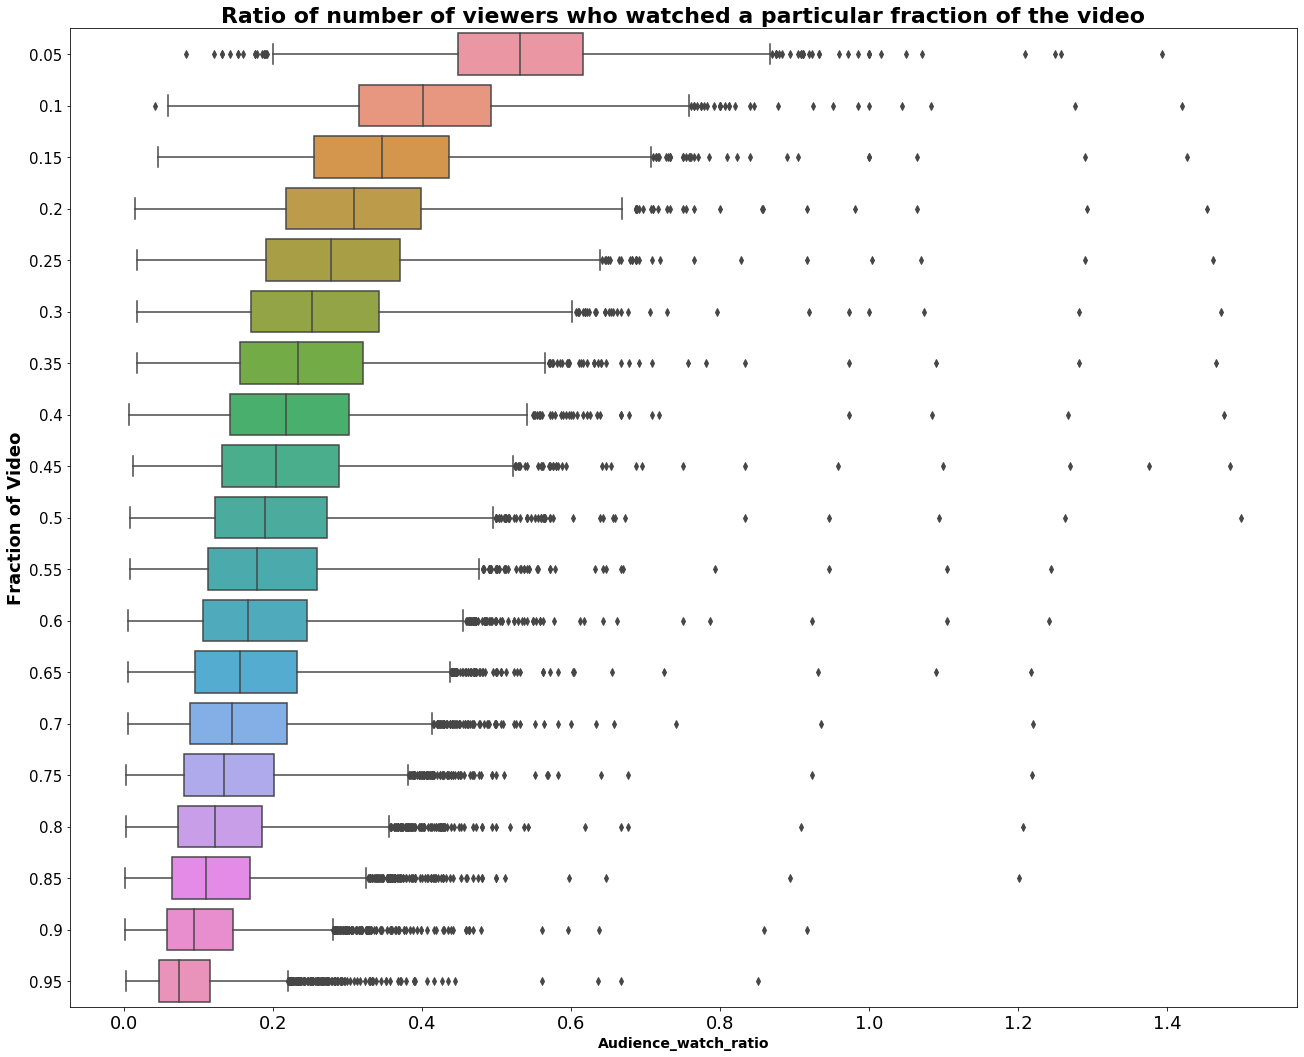

In [17]:
frac_arr_mod=[]
watch_ratio_arr_mod=[]
reqd_arr=[]
curr=0
GAP=0.05
while curr<1:
    reqd_arr.append(curr)
    curr+=GAP
    curr=round(curr,2)
print(reqd_arr)
for pair in pair_list:
    if pair[0] in reqd_arr:
        frac_arr_mod.append(pair[0])
        watch_ratio_arr_mod.append(pair[1])
# initialise data of lists.
data = {'fraction_passed':frac_arr_mod, 'audienceWatchRatio':watch_ratio_arr_mod}
 
# Create DataFrame
df_mod = pd.DataFrame(data)
# look at price by year boxplot
# limit upper prices so it's more informative
fig = plt.figure(figsize=(22,18))
ax = fig.gca()
sns.boxplot(x='audienceWatchRatio',y='fraction_passed',data=df_mod,
            order=sorted(df_mod["fraction_passed"].unique()),orient='h')
plt.xlabel('Audience_watch_ratio',fontsize=14,fontweight="bold")
#ax.set_yticklabels(sorted(cc_data.modelYear.unique()))
plt.ylabel('Fraction of Video',fontsize=18,fontweight="bold")
plt.title('Ratio of number of viewers who watched a particular fraction of the video',fontsize=22,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.savefig('foo_2.png')
plt.show()

## --------------------------------------------------------------------------

In [20]:
file_obj['successful_files'][0]['stats'][0]['rows'][0]

[0.01, 0.9773000000000001, 0.5189]

In [18]:
pair_list=[]
for video_stuff in file_obj['successful_files']:
    all_rows=video_stuff['stats'][0]['rows']
    '''if len(all_rows)!=100:
        print(len(all_rows))'''
    for row in all_rows:
        fraction=row[0]
        perf=row[2]
        pair_list.append([fraction, perf])

In [19]:
len(file_obj['successful_files'])

4872

In [21]:
len(pair_list)

442669

In [25]:
frac_arr=[]
perf_ratio_arr=[]
for pair in pair_list:
    frac_arr.append(pair[0])
    perf_ratio_arr.append(pair[1])

In [28]:
# initialise data of lists.
data = {'fraction_passed':frac_arr, 'relativeRetentionPerformance':perf_ratio_arr}
 
# Create DataFrame
df = pd.DataFrame(data)

In [29]:
df.columns

Index(['fraction_passed', 'relativeRetentionPerformance'], dtype='object')

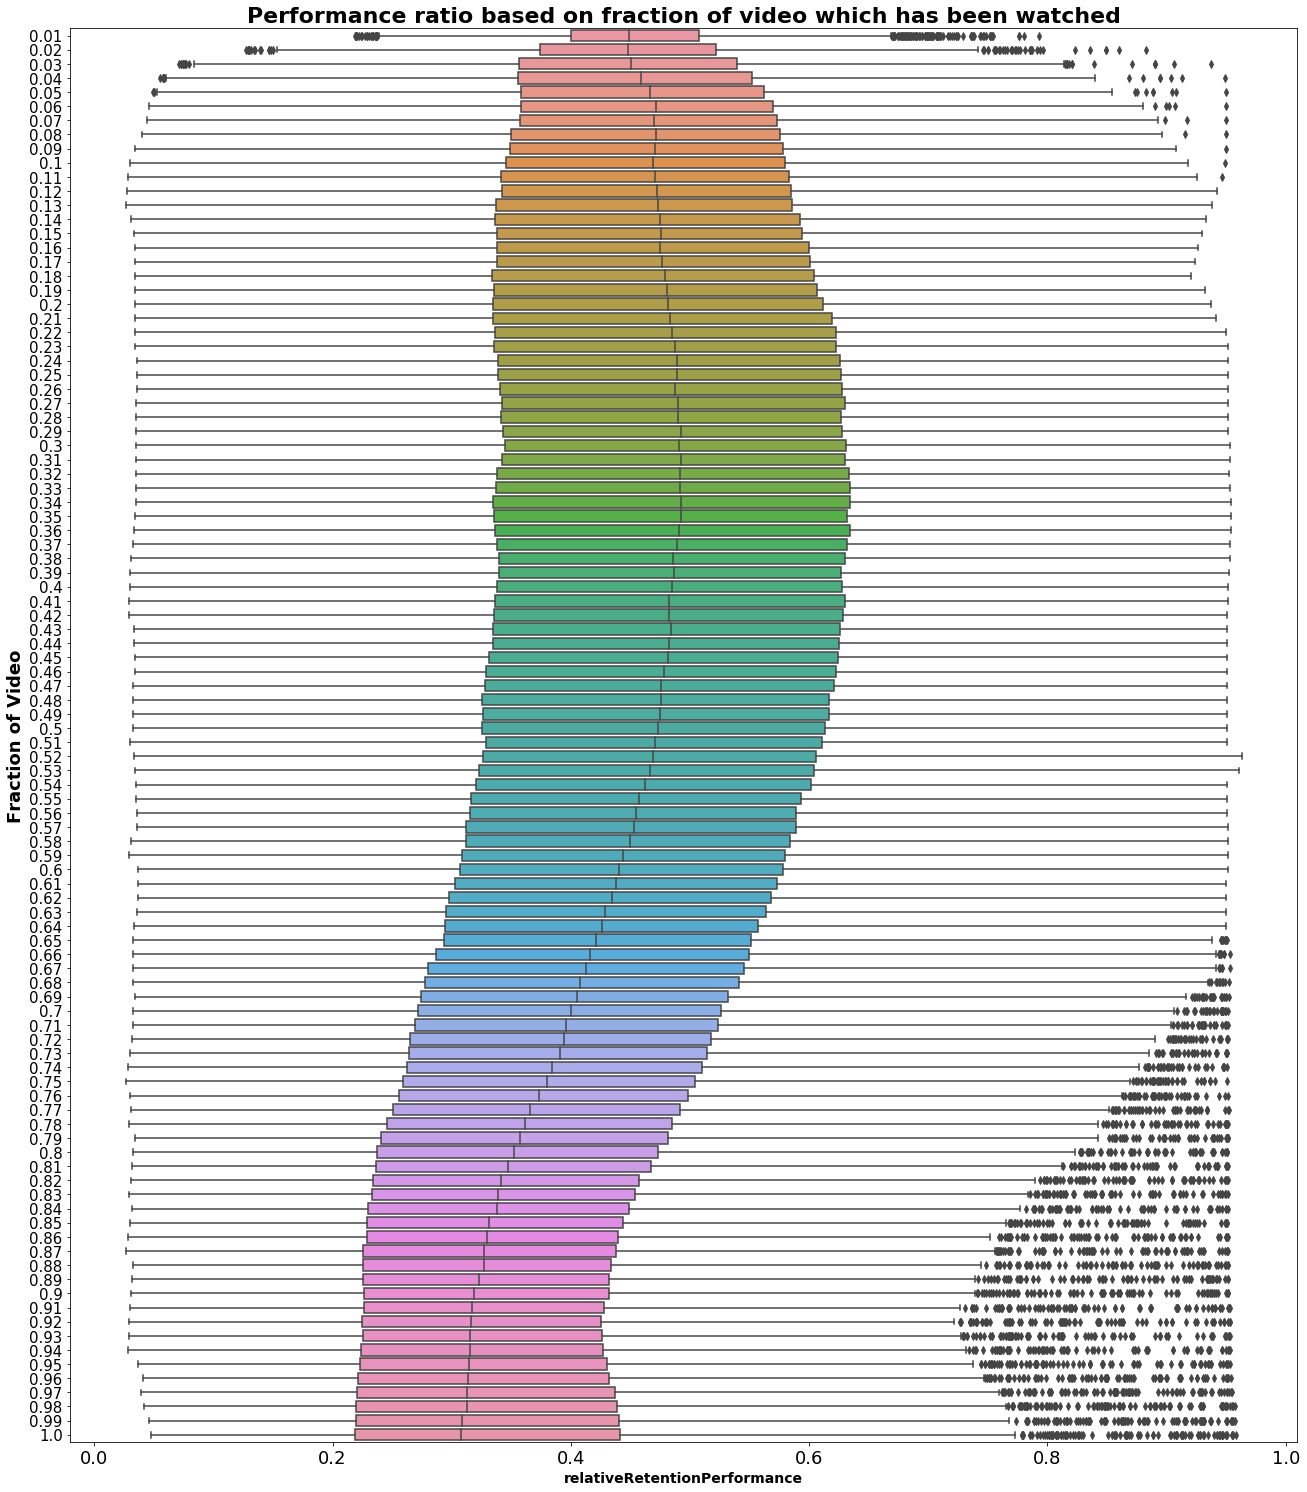

In [30]:
# look at price by year boxplot
# limit upper prices so it's more informative
fig = plt.figure(figsize=(22,26))
ax = fig.gca()
sns.boxplot(x='relativeRetentionPerformance',y='fraction_passed',data=df,
            order=sorted(df["fraction_passed"].unique()),orient='h')
plt.xlabel('relativeRetentionPerformance',fontsize=14,fontweight="bold")
#ax.set_yticklabels(sorted(cc_data.modelYear.unique()))
plt.ylabel('Fraction of Video',fontsize=18,fontweight="bold")
plt.title('Performance ratio based on fraction of video which has been watched',fontsize=22,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.savefig('foo.png')
plt.show()

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


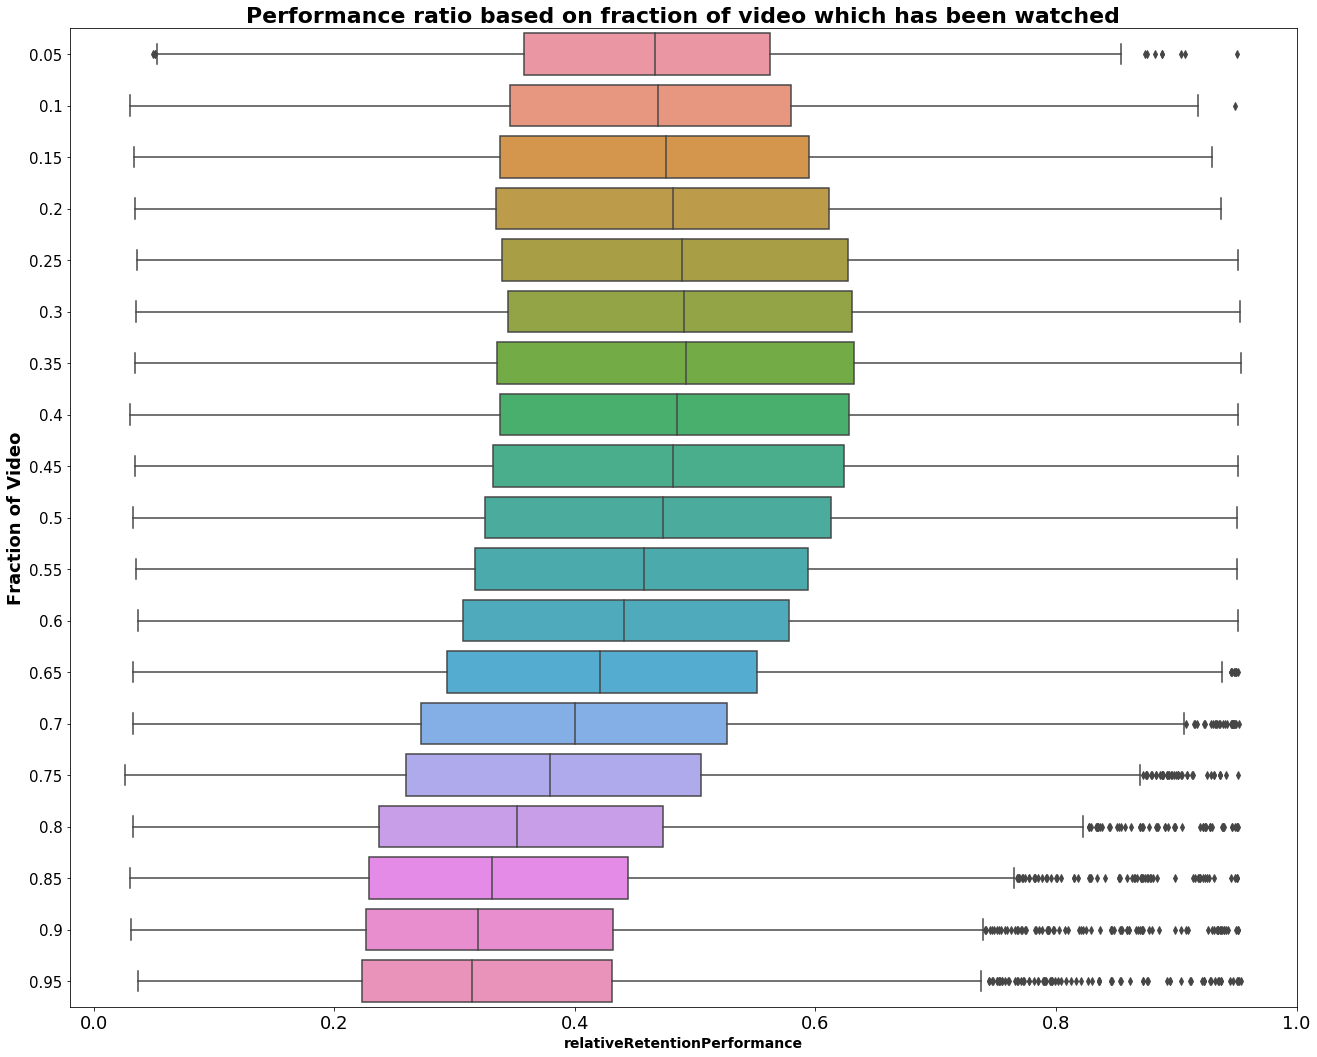

In [32]:
frac_arr_mod=[]
perf_ratio_arr_mod=[]
reqd_arr=[]
curr=0
GAP=0.05
while curr<1:
    reqd_arr.append(curr)
    curr+=GAP
    curr=round(curr,2)
print(reqd_arr)
for pair in pair_list:
    if pair[0] in reqd_arr:
        frac_arr_mod.append(pair[0])
        perf_ratio_arr_mod.append(pair[1])
# initialise data of lists.
data = {'fraction_passed':frac_arr_mod, 'relativeRetentionPerformance':perf_ratio_arr_mod}
 
# Create DataFrame
df_mod = pd.DataFrame(data)
# look at price by year boxplot
# limit upper prices so it's more informative
fig = plt.figure(figsize=(22,18))
ax = fig.gca()
sns.boxplot(x='relativeRetentionPerformance',y='fraction_passed',data=df_mod,
            order=sorted(df_mod["fraction_passed"].unique()),orient='h')
plt.xlabel('relativeRetentionPerformance',fontsize=14,fontweight="bold")
#ax.set_yticklabels(sorted(cc_data.modelYear.unique()))
plt.ylabel('Fraction of Video',fontsize=18,fontweight="bold")
plt.title('Performance ratio based on fraction of video which has been watched',fontsize=22,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.savefig('foo_2.png')
plt.show()